In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
%matplotlib inline

In [2]:
folder = 'C:/Users/nagpa/Desktop/Semester 6/Phys 3888 - Physics Interdisiplinary Project/Reports/Project Report'
os.chdir(folder)
(os.listdir())

['.ipynb_checkpoints',
 '110520_BBx5_5.wav',
 '110520_Bx5_1.wav',
 '110520_L_1.wav',
 '170520_DBLRLDB_1.wav',
 '170520_DBRLRDB_1.wav',
 '170520_DBRRDB_3.wav',
 '170520_LRRDB_1.wav',
 '170520_LRRDB_2.wav',
 '170520_LRRDB_3.wav',
 '2020-05-24_1_Cleared.wav',
 '2020-05-24_1_Raw.wav',
 'Back_L_3.wav',
 'blinkspectrogram.m',
 'Clear 110520_BBx5_1.wav',
 'Edge_Cases.eps',
 'FFT vs Raw L R DB',
 'fftplot.m',
 'FFT_Bandpass.eps',
 'Filters',
 'Front_B_1.wav',
 'Front_L_2.wav',
 'Front_R_3.wav',
 'Headband_wave.eps',
 'LLLLL_3.wav',
 'LLL_O.wav',
 'look left oliver.wav',
 'look left sahir final.wav',
 'look right oliver.wav',
 'look right sahir final.wav',
 'LRB_1.wav',
 'Lside_L_2.wav',
 'right look sahir.wav',
 'RLRLR_2.wav',
 'Schematic.eps',
 'Schematic.jpg',
 'step.m',
 'Time_analysis.eps',
 'Time_analysis_zoom.eps',
 'Untitled.ipynb',
 'Untitled.m']

# FFT Of Pre Recorded Data

In [3]:
# Does the fft

def spectrum(t,x):
    frequency = np.fft.rfftfreq(len(t),d=t[1]-t[0])
    amplitude = (np.fft.rfft(x)) 
    return frequency, amplitude

In [4]:
# To cut off frequencies with noise

def steplow(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]<=cut:
            amp[i] = 0
    return amp

def stephigh(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]>=cut:
            amp[i] = 0
    return amp

In [29]:
def spectrum(t,x):
    frequency = np.fft.rfftfreq(len(t),d=t[1]-t[0])
    amplitude = (np.fft.rfft(x)) 
    return frequency, amplitude

def steplow(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]<=cut:
            amp[i] = 0
    return amp

def stephigh(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]>=cut:
            amp[i] = 0
    return amp

def fftplot(filename,stdev=3,title = None,fast = True,zoom = None,cutlow=0,cuthigh=40,enlarge=False,cube=False,plot=True):
    fs, data = wavfile.read(str(filename))
    
#   Defining time domain and taking the FFT
    df = fs/len(data) # = 1/T
    if fast == True:
        nfft = (2**14)
    else:
        nfft = len(data)
    data = data[0:nfft]
    t = np.linspace(0,len(data)/fs,len(data))
    freq, amp = spectrum(t,data)
#     amp1 = np.abs(amp)
#     amp = steplow(cutlow,freq,amp)
#     amp = stephigh(cuthigh,freq,amp)
    cutamp = steplow(cutlow,freq,amp)
    cutamp = stephigh(cuthigh,freq,amp)
    
    
    Y = np.fft.irfft(amp)
    
    if cube:
        Y=Y**3
        
    if zoom == None:
        t1 = t
    else:
        cutfreq = freq[0:zoom]
        cutamp = amp[0:zoom]
        t1 = t[0:zoom]

    cutamp = np.abs(cutamp)**2
    
    # Fitting a Gaussian
    wid = 2*(stdev**2)
    wid1  = 100
    cen = freq[np.argmax(cutamp)]
    g = cutamp*np.exp(-((cutfreq - cen)**2)/wid)
    G = np.exp(-(cutfreq - cen)**2/wid)
    G_all = amp*np.exp(-((freq - cen)**2)/wid)
    
    YY = np.fft.irfft(G_all)
#   Plotting the waveform and the correspondng FFT
    
    
    if plot:
        fig, ax = plt.subplots(1,1,figsize=(15,5))
#     if enlarge == True:
#         top = 3
#         bottom = 1
#     else:
#         top = 1.5
#         bottom = 1
#     fig.subplots_adjust(top=top,bottom=bottom)
        
#     ax.plot(t,data)
#     ax.set_xlabel('Time (s)',fontsize=15)
#     ax.set_ylabel('Amplitude',fontsize=15)
#     ax.set_title('Wave',fontsize=20)
#     ax.tick_params(axis='both',labelsize=13)
#         amp = np.abs(amp[0:zoom])**2
# #         ax.plot(cutfreq,cutamp/2)
#         ax.plot(cutfreq,amp)
#         ax.set_ylabel('Amplitude',fontsize=15)
#         ax.set_xlabel('Frequency (Hz)',fontsize=15)
#         ax.tick_params(axis='both',labelsize=13)
#         YY=YY[20000:-10000]
        ax.plot(t[0:len(Y[20000:-10000])],Y[20000:-10000]**3)
        ax.set_xlabel('Time (s)',fontsize=15)
        ax.set_ylabel('Amplitude',fontsize=15)
#        ax.set_title('Wave produced after stripping high frequencies',fontsize=20)
#         ax.tick_params(axis='both',labelsize=13)
#         plt.annotate('Left',(7.5,150),fontsize=13,color='b')
#         plt.annotate('Right',(7.5,-120),fontsize=13,color='r')
#         plt.annotate('Double\nBlink',(7.5,45),fontsize=13,color='g')
#         ax.axhline(150,color='b')
#         ax.axhline(-120,color='r')
#         ax.axhline(45,color='g')
#     #     ax.axhline('Double\nBLink')
#         ax.axvline(3.5,color='b')
#         ax.axvline(8,color='k')
#         plt.annotate('Band Limit',(7.5,3e13),color='k',fontsize=15,rotation=90)
        plt.annotate('Left',(1.55,0.5e7),color='b')
        ax.axvline(1,color='b')
        ax.axvline(2,color='b')
        plt.annotate('Right',(3.55,0.5e7),color='r')
        ax.axvline(3.5,color='r')
        ax.axvline(4.1,color='r')
        plt.annotate('Double\nBlink',(6.12,0.4e7),color='g')
        ax.axvline(5.8,color='g')
        ax.axvline(6.1,color='g')
        plt.grid('both')
        extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig('FFT_cubed.eps',format='eps',bbox_inches=extent.expanded(1.2, 1.35))
#     ax[3].plot(cutfreq,G,linewidth=2.5)
#     ax[3].set_ylabel('Amplitude',fontsize=20)
#     ax[3].set_xlabel('Time domain (s)',fontsize=15)
#     ax[3].set_title('Gaussian Distribution',fontsize=20)
#     ax[3].tick_params(axis='both',labelsize=13)

#     ax[4].plot(cutfreq,g,linewidth=2.5)
#     ax[4].set_ylabel('Amplitude',fontsize=15)
#     ax[4].set_xlabel('Frequency (Hz)',fontsize=15)
#     ax[4].set_title('Fourier Transform With Gaussian fit',fontsize=20)
#     ax[4].tick_params(axis='both',labelsize=13)

#     ax[5].plot(t,YY,linewidth=2.5)
#     ax[5].set_xlabel('Time (s)',fontsize=15)
#     ax[5].set_ylabel('Amplitude',fontsize=15)
#     ax[5].set_title('Wave produced from Inverse FFT after Gaussian',fontsize=20)
#     ax[5].tick_params(axis='both',labelsize=13)
    
#     ax[6].plot(t,YY,t,data,linewidth=2.5)
#     ax[6].set_xlabel('Time (s)',fontsize=15)
#     ax[6].set_ylabel('Amplitude',fontsize=15)
#     ax[6].set_title('Wave data and data-smoothed wave',fontsize=20)
#     ax[6].tick_params(axis='both',labelsize=13)
    
#     ax[7].plot(cutfreq,cutamp,cutfreq,g,linewidth=2.5)
#     ax[7].set_ylabel('Amplitude',fontsize=15)
#     ax[7].set_xlabel('Frequency (Hz)',fontsize=15)
#     ax[7].set_title('Fourier Transform compared to noise reduced from gaussian '+str(cuthigh)+' Hz stripped off',fontsize=20)
#     ax[7].tick_params(axis='both',labelsize=13)
        
# #    Setting the title
    if title != None:
        fig.suptitle(str(title),fontsize = 20)
        
#     return print("Peak Frequency at", freq[np.argmax(amp)])
# '2020-05-24_1_Raw.wav'

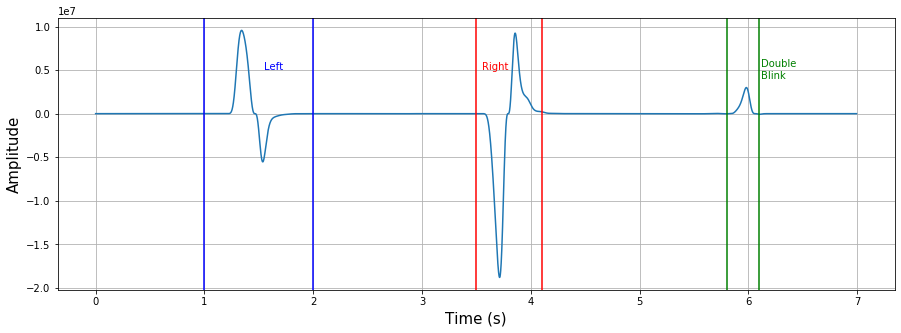

In [30]:
fftplot('2020-05-24_1_Raw.wav',stdev=5,zoom=200,plot=True,cuthigh=8,cube=False,fast=False)

In [12]:
files = os.listdir()
t = np.array([])
for file in files:
    start_time = time.time()
    if '.wav' in file:
        fftplot(file,stdev=5,zoom=200,plot=False,cuthigh=15,cube=True,fast=False)
        t = np.append(t,time.time() - start_time)

# time.process_time()

In [13]:
print(len(t))
matlab_t = np.array([54.67,49.97,54.43,317.11,319.03,202.69,188.7,188.78,190.93,57.02,1.95,64.83,4.52,2,1.82,149.16,43.43,79.25,1.83,104.14,62.42,64.00,59.62,67.20,68.97,])

25


In [14]:
cols = ['Python','MATLAB']
df = pd.DataFrame(columns=cols)
df['Python'] = t
df['MATLAB'] = matlab_t
# xbins,edges = np.histogram(df['Python'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


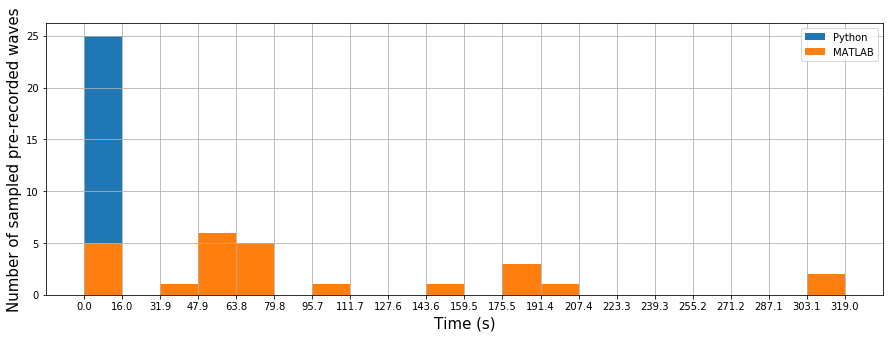

In [18]:
count,binedges = np.histogram(df,20)
df.plot(kind='hist',figsize=(15,5),xticks=binedges,bins=20)
plt.grid('both')
plt.xlabel('Time (s)',fontsize=15); 
plt.ylabel('Number of sampled pre-recorded waves',fontsize=15)
plt.savefig('Time_analysis.eps',format='eps')
plt.show()

In [19]:
df = df.sort_values(['MATLAB'],ascending=True,axis=0)
df_zoom = df.head(5)
df=df_zoom.reset_index()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


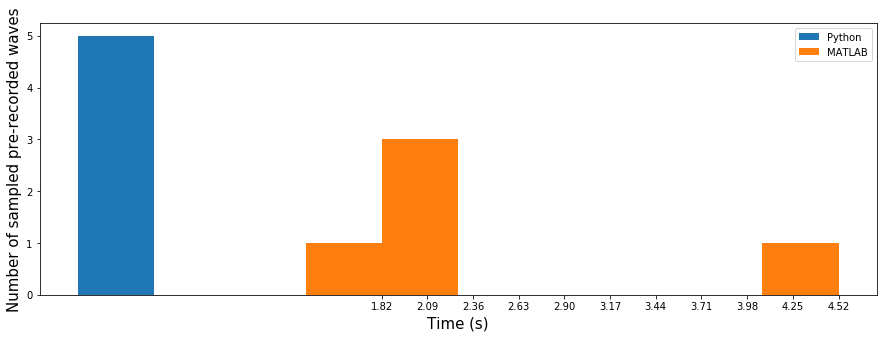

In [99]:
count,binedges = np.histogram(df['MATLAB'])
df_zoom.plot(kind='hist',figsize=(15,5),xticks=binedges)
# plt.grid('both')
plt.xlabel('Time (s)',fontsize=15); 
# plt.grid('both')
plt.ylabel('Number of sampled pre-recorded waves',fontsize=15)
plt.savefig('Time_analysis_zoom.eps',format='eps')
plt.show()

(array([5.]), array([0.02396536, 0.12164736]), <a list of 1 Patch objects>)

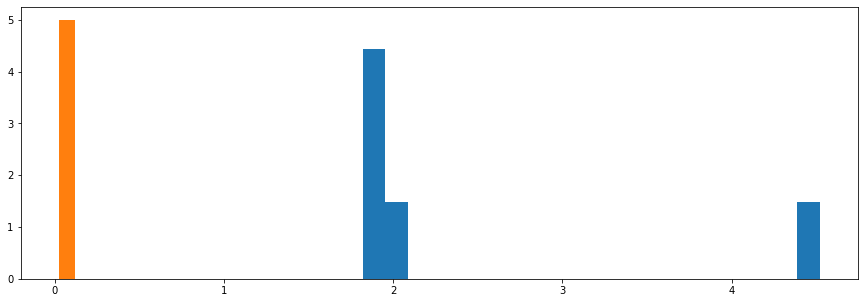

In [127]:
plt.figure(figsize=(15,5))
counts,edges=np.histogram(df_zoom['MATLAB'],5)
plt.hist(df_zoom['MATLAB'],stacked=True,density=True,bins=20)
plt.hist(df['Python'],bins=1)

In [154]:
df[df>=16]= np.NaN
# df.drop(["index"],axis=1,inplace=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


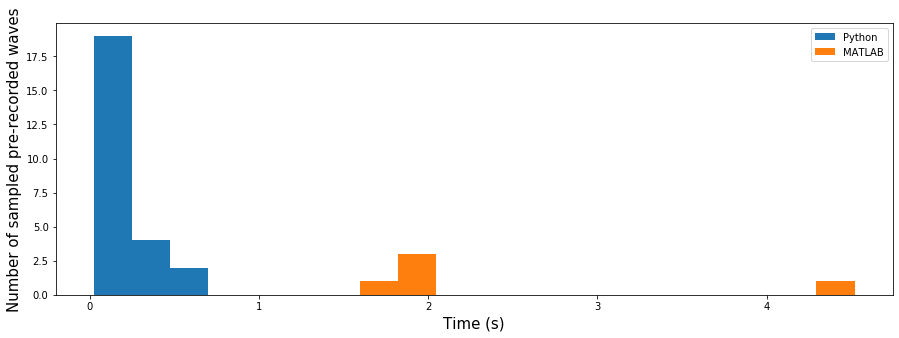

In [165]:
# count,edges = np.histogram(df_zoom)
df.plot(kind='hist',figsize=(15,5),bins=20)
plt.xlabel('Time (s)',fontsize=15); 
# plt.grid('both')
plt.ylabel('Number of sampled pre-recorded waves',fontsize=15)
plt.savefig('Time_analysis_zoom.eps',format='eps')